# Inputs

In [1]:
import os
import pandas as pd
import yaml
import torch
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)
print(torch.cuda.get_device_name())
print(torch.__version__)
print(torch.version.cuda)
x = torch.randn(1).cuda()
print(x)

cuda
NVIDIA GeForce RTX 4050 Laptop GPU
2.7.0+cu128
12.8
tensor([0.3359], device='cuda:0')


In [3]:
CONFIG_PATH = "configs/uc_infeksi_chron_tb"

In [4]:
DATASET_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "dataset.yaml")), Loader=yaml.SafeLoader)
PREPROCESSING_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "preprocessing.yaml")), Loader=yaml.SafeLoader)
MODEL_NAME = yaml.load(open(os.path.join(CONFIG_PATH, "model.yaml")), Loader=yaml.SafeLoader)['MODEL_NAME']
MODEL_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "model.yaml")), Loader=yaml.SafeLoader)[MODEL_NAME]
TRAINING_PARAMS = yaml.load(open(os.path.join(CONFIG_PATH, "training.yaml")), Loader=yaml.SafeLoader)

In [5]:
categories =  DATASET_PARAMS['CATEGORIES']

BASE_DIR = os.getcwd()
DATASET_DIR = os.path.join(BASE_DIR, DATASET_PARAMS['DATA_PATH'])

TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR = os.path.join(DATASET_DIR, "val")
TEST_DIR = os.path.join(DATASET_DIR, "test")
categories

['uc', 'infeksi', 'chron', 'tb']

In [6]:
from src.utils import get_device, set_seed

set_seed(DATASET_PARAMS['SEED'])
DEVICE = get_device()
print(f"Using device: {DEVICE}")

Using device: cuda


# Dataset

The dataset structure must be like this:

XDL_Collitis/
├── datasets/
│   ├── uc/
│   │   ├── limuc/
│   │   │   ├── uc_1/
│   │   │   ├── uc_2/
│   │   │   └── uc_3/
│   │   ├── changsu/
│   │   │   ├── uc_1/
│   │   │   ├── uc_2/
│   │   │   └── uc_3/
│   │   └── hyperkvasir/
│   │       ├── uc_1/
│   │       ├── uc_2/
│   │       └── uc_3/
│   └── infeksi/
│       └── infeksi_non_spesifik/

In [7]:
from src.utils import split_dataset

In [8]:
# train_filenames_df, val_filenames_df, test_filenames_df = split_dataset(DATASET_DIR, 
#                                                                         categories, 
#                                                                         DATASET_PARAMS['UC_SOURCE'], 
#                                                                         shuffle=DATASET_PARAMS['IS_SHUFFLE'], 
#                                                                         seed=DATASET_PARAMS['SEED'], 
#                                                                         split_ratio=DATASET_PARAMS['SPLIT_RATIO'])

In [9]:
DATASET_DIR

'c:\\Users\\hafiz\\Downloads\\Project Istri Pak Lavi\\XDL_Collitis\\datasets'

In [10]:
uc_filenames = {"image_path": [], "class": [], "source": []}

uc_directory = os.path.join(DATASET_DIR, "uc")

uc_subdirectories = os.listdir(uc_directory)

for subdirectory in uc_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(uc_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                uc_filenames["image_path"].append(image_path)
                uc_filenames["class"].append("uc")
                uc_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

uc_filenames_df = pd.DataFrame(uc_filenames)
uc_filenames_df

subdirectory: changsu_cropped
subdirectory: indo_cropped
subdirectory: indo_cropped_test
subdirectory: limuc_cropped_2


,image_path,class,source
0,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,changsu_cropped
1,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,changsu_cropped
2,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,changsu_cropped
3,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,changsu_cropped
4,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,changsu_cropped
...,...,...,...
2945,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,limuc_cropped_2
2946,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,limuc_cropped_2
2947,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,limuc_cropped_2
2948,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,uc,limuc_cropped_2


In [11]:
infeksi_filenames = {"image_path": [], "class": [], "source": []}

infeksi_directory = os.path.join(DATASET_DIR, "infeksi")

infeksi_subdirectories = os.listdir(infeksi_directory)

for subdirectory in infeksi_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(infeksi_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                infeksi_filenames["image_path"].append(image_path)
                infeksi_filenames["class"].append("infeksi")
                infeksi_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

infeksi_filenames_df = pd.DataFrame(infeksi_filenames)
infeksi_filenames_df

subdirectory: indo_cropped


,image_path,class,source
0,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
1,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
2,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
3,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
4,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
...,...,...,...
1297,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
1298,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
1299,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped
1300,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,infeksi,indo_cropped


In [12]:
# infeksi_filenames = {"image_path": [], "class": [], "source": []}

# infeksi_directory = os.path.join(DATASET_DIR, "infeksi")

# infeksi_subdirectories = os.listdir(infeksi_directory)

# for subdirectory in infeksi_subdirectories:
#     print(f"subdirectory: {subdirectory}")
#     files = os.listdir(os.path.join(infeksi_directory, subdirectory))

#     for file in files:
#         infeksi_filenames["image_path"].append(os.path.join(infeksi_directory, subdirectory, file))
#         infeksi_filenames["class"].append('infeksi')
#         infeksi_filenames["source"].append(subdirectory)

# infeksi_filenames_df = pd.DataFrame(infeksi_filenames)
# infeksi_filenames_df

In [13]:
# def get_filename_from_path(path):
#     return path.split('\\')[-1]

# infeksi_filenames_df['filename'] = infeksi_filenames_df['image_path'].apply(get_filename_from_path)
# infeksi_indonesia_test_filenames_df = infeksi_filenames_df[infeksi_filenames_df['source'] == 'infeksi test set']

# infeksi_filtered_filenames_df = infeksi_filenames_df[~infeksi_filenames_df['filename'].isin(infeksi_indonesia_test_filenames_df['filename'])]
# infeksi_filtered_filenames_df

In [14]:
chron_filenames = {"image_path": [], "class": [], "source": []}

chron_directory = os.path.join(DATASET_DIR, "chron")

chron_subdirectories = os.listdir(chron_directory)

for subdirectory in chron_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(chron_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                chron_filenames["image_path"].append(image_path)
                chron_filenames["class"].append("chron")
                chron_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

chron_filenames_df = pd.DataFrame(chron_filenames)
chron_filenames_df

subdirectory: asan_cropped
subdirectory: indo_cropped
subdirectory: indo_cropped_test


,image_path,class,source
0,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,asan_cropped
1,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,asan_cropped
2,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,asan_cropped
3,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,asan_cropped
4,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,asan_cropped
...,...,...,...
2101,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,indo_cropped_test
2102,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,indo_cropped_test
2103,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,indo_cropped_test
2104,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,chron,indo_cropped_test


In [15]:
tb_filenames = {"image_path": [], "class": [], "source": []}

tb_directory = os.path.join(DATASET_DIR, "tb")

tb_subdirectories = os.listdir(tb_directory)

for subdirectory in tb_subdirectories:
    print(f"subdirectory: {subdirectory}")
    subdirectory_path = os.path.join(tb_directory, subdirectory)
    
    # Walk through each subdirectory to find images
    for root, dirs, files in os.walk(subdirectory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                tb_filenames["image_path"].append(image_path)
                tb_filenames["class"].append("tb")
                tb_filenames["source"].append(subdirectory)  # Use the subdirectory name as the source

tb_filenames_df = pd.DataFrame(tb_filenames)
tb_filenames_df

subdirectory: asan_cropped
subdirectory: indo_cropped
subdirectory: indo_cropped_test


,image_path,class,source
0,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,asan_cropped
1,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,asan_cropped
2,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,asan_cropped
3,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,asan_cropped
4,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,asan_cropped
...,...,...,...
1318,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,indo_cropped_test
1319,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,indo_cropped_test
1320,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,indo_cropped_test
1321,c:\Users\hafiz\Downloads\Project Istri Pak Lav...,tb,indo_cropped_test


In [16]:
from sklearn.model_selection import train_test_split

# UC
uc_trainval_filenames_df, uc_test_filenames_df = train_test_split(uc_filenames_df,
                                                                  test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                  random_state=DATASET_PARAMS['SEED'],
                                                                  stratify=uc_filenames_df['source'])

uc_train_filenames_df, uc_val_filenames_df = train_test_split(uc_trainval_filenames_df,
                                                              test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1 / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                              random_state=DATASET_PARAMS['SEED'],
                                                              stratify=uc_trainval_filenames_df['source'])

# Infeksi
# infeksi_train_filenames_df, infeksi_val_filenames_df = train_test_split(infeksi_filtered_filenames_df,
#                                                                         test_size=DATASET_PARAMS['SPLIT_RATIO'][-2],
#                                                                         random_state=DATASET_PARAMS['SEED'],
#                                                                         stratify=infeksi_filtered_filenames_df['source'])

# infeksi_test_filenames_df = infeksi_indonesia_test_filenames_df

infeksi_trainval_filenames_df, infeksi_test_filenames_df = train_test_split(infeksi_filenames_df,
                                                                  test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                  random_state=DATASET_PARAMS['SEED'],
                                                                  stratify=infeksi_filenames_df['source'])

infeksi_train_filenames_df, infeksi_val_filenames_df = train_test_split(infeksi_trainval_filenames_df,
                                                              test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1 / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                              random_state=DATASET_PARAMS['SEED'],
                                                              stratify=infeksi_trainval_filenames_df['source'])

# Chron
chron_trainval_filenames_df, chron_test_filenames_df = train_test_split(chron_filenames_df,
                                                                        test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                        random_state=DATASET_PARAMS['SEED'],
                                                                        stratify=chron_filenames_df['source'])

chron_train_filenames_df, chron_val_filenames_df = train_test_split(chron_trainval_filenames_df,
                                                                    test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1 / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                                    random_state=DATASET_PARAMS['SEED'],
                                                                    stratify=chron_trainval_filenames_df['source'])

# TB
tb_trainval_filenames_df, tb_test_filenames_df = train_test_split(tb_filenames_df,
                                                                    test_size=DATASET_PARAMS['SPLIT_RATIO'][-1],
                                                                    random_state=DATASET_PARAMS['SEED'],
                                                                    stratify=tb_filenames_df['source'])

tb_train_filenames_df, tb_val_filenames_df = train_test_split(tb_trainval_filenames_df,
                                                                    test_size=DATASET_PARAMS['SPLIT_RATIO'][-2] * 1
                                                                    / (1 - DATASET_PARAMS['SPLIT_RATIO'][-1]),
                                                                    random_state=DATASET_PARAMS['SEED'],
                                                                    stratify=tb_trainval_filenames_df['source'])

In [17]:
# # For TB: take all indo_cropped and indo_cropped_test sourced files and complete the rest with asan sourced file until 1000 files
# tb_train_filenames_df_indo = tb_train_filenames_df[(tb_train_filenames_df['source'] == 'indo_cropped') | (tb_train_filenames_df['source'] == 'indo_cropped_test')]
# tb_train_filenames_df_asan = tb_train_filenames_df[tb_train_filenames_df.index.isin(tb_train_filenames_df_indo.index) == False]

# total_non_indo = 1000 - len(tb_train_filenames_df_indo)
# tb_train_filenames_df_asan = tb_train_filenames_df_asan.sample(n=total_non_indo, random_state=DATASET_PARAMS['SEED'])

# tb_train_filenames_df = pd.concat([tb_train_filenames_df_indo, tb_train_filenames_df_asan], ignore_index=True)

In [18]:
# # For Infeksi, sample 1000 files
# infeksi_train_filenames_df = infeksi_train_filenames_df.sample(n=1000, random_state=DATASET_PARAMS['SEED'], replace=False)

In [19]:
# # For UC, sample 500 from indo_cropped and indo_cropped_test and sample 250 from limuc_cropped_2 and changu_cropped
# uc_train_filenames_df_indo = uc_train_filenames_df[(uc_train_filenames_df['source'] == 'indo_cropped') | (uc_train_filenames_df['source'] == 'indo_cropped_test')]
# uc_train_filenames_df_limuc = uc_train_filenames_df[uc_train_filenames_df['source'] == 'limuc_cropped_2']
# uc_train_filenames_df_changsu = uc_train_filenames_df[uc_train_filenames_df['source'] == 'changsu_cropped']

# # Sample 500 from indo_cropped and indo_cropped_test
# uc_train_filenames_df_indo = uc_train_filenames_df_indo.sample(n=len(uc_train_filenames_df_indo), random_state=DATASET_PARAMS['SEED'], replace=False)

# # Sample each 250 from limuc_cropped_2 and changu_cropped
# total_non_indo = 1000 - len(uc_train_filenames_df_indo)
# total_each_non_indo = total_non_indo // 2

# uc_train_filenames_df_limuc = uc_train_filenames_df_limuc.sample(n=total_each_non_indo, random_state=DATASET_PARAMS['SEED'], replace=False)
# uc_train_filenames_df_changsu = uc_train_filenames_df_changsu.sample(n=total_each_non_indo, random_state=DATASET_PARAMS['SEED'], replace=False)

# uc_train_filenames_df = pd.concat([uc_train_filenames_df_indo, uc_train_filenames_df_limuc, uc_train_filenames_df_changsu], ignore_index=True)

In [20]:
# # For Chron, take all indo_cropped and indo_cropped_test sourced files and complete the rest with asan sourced file until 1000 files
# chron_train_filenames_df_indo = chron_train_filenames_df[(chron_train_filenames_df['source'] == 'indo_cropped') | (chron_train_filenames_df['source'] == 'indo_cropped_test')]
# chron_train_filenames_df_asan = chron_train_filenames_df[chron_train_filenames_df.index.isin(chron_train_filenames_df_indo.index) == False]

# # Sample 500 from indo_cropped and indo_cropped_test
# chron_train_filenames_df_indo = chron_train_filenames_df_indo.sample(n=len(chron_train_filenames_df_indo), random_state=DATASET_PARAMS['SEED'], replace=False)

# # Sample 500 from asan
# total_non_indo = 1000 - len(chron_train_filenames_df_indo)
# chron_train_filenames_df_asan = chron_train_filenames_df_asan.sample(n=total_non_indo, random_state=DATASET_PARAMS['SEED'], replace=False)

# chron_train_filenames_df = pd.concat([chron_train_filenames_df_indo, chron_train_filenames_df_asan], ignore_index=True)

In [21]:
# train_filenames_df = pd.concat([uc_train_filenames_df, infeksi_train_filenames_df, chron_train_filenames_df, tb_train_filenames_df], ignore_index=True)
# val_filenames_df = pd.concat([uc_val_filenames_df, infeksi_val_filenames_df, chron_val_filenames_df, tb_val_filenames_df], ignore_index=True)
# test_filenames_df = pd.concat([uc_test_filenames_df, infeksi_test_filenames_df, chron_test_filenames_df, tb_test_filenames_df], ignore_index=True)

train_filenames_df = pd.concat([uc_train_filenames_df, infeksi_train_filenames_df], ignore_index=True)
val_filenames_df = pd.concat([uc_val_filenames_df, infeksi_val_filenames_df], ignore_index=True)
test_filenames_df = pd.concat([uc_test_filenames_df, infeksi_test_filenames_df], ignore_index=True)

# train_filenames_df = pd.concat([chron_train_filenames_df, tb_train_filenames_df], ignore_index=True)
# val_filenames_df = pd.concat([chron_val_filenames_df, tb_val_filenames_df], ignore_index=True)
# test_filenames_df = pd.concat([chron_test_filenames_df, tb_test_filenames_df], ignore_index=True)

In [22]:
# Take only 'indo_cropped' and 'indo_cropped_test' sources for training and validation
train_filenames_df = train_filenames_df[(train_filenames_df['source'] == 'indo_cropped') | (train_filenames_df['source'] == 'indo_cropped_test') | (train_filenames_df['class'] == 'infeksi')]
val_filenames_df = val_filenames_df[(val_filenames_df['source'] == 'indo_cropped') | (val_filenames_df['source'] == 'indo_cropped_test') | (val_filenames_df['class'] == 'infeksi')]
test_filenames_df = test_filenames_df[(test_filenames_df['source'] == 'indo_cropped') | (test_filenames_df['source'] == 'indo_cropped_test') | (test_filenames_df['class'] == 'infeksi')]

In [23]:
# Shuffle train and validation sets
train_filenames_df = train_filenames_df.sample(frac=1, random_state=DATASET_PARAMS['SEED']).reset_index(drop=True)

In [24]:
# # Randomly choose infeksi class samples to balance the dataset
# dataset_size = max([len(train_filenames_df[train_filenames_df['class'] == 'uc']), 
#                        len(train_filenames_df[train_filenames_df['class'] == 'chron']),
#                        len(train_filenames_df[train_filenames_df['class'] == 'tb'])])

# infeksi_samples_train_filesname_df = train_filenames_df[train_filenames_df['class'] == 'infeksi'].sample(n=dataset_size, random_state=DATASET_PARAMS['SEED'])
# infeksi_samples_train_filesname_df_index = infeksi_samples_train_filesname_df.index

# # Filter the train_filenames_df to include only the infeksi samples
# train_filenames_df = train_filenames_df[(train_filenames_df['class'] != 'infeksi') | (train_filenames_df.index.isin(infeksi_samples_train_filesname_df_index))]

## Inspect dataset


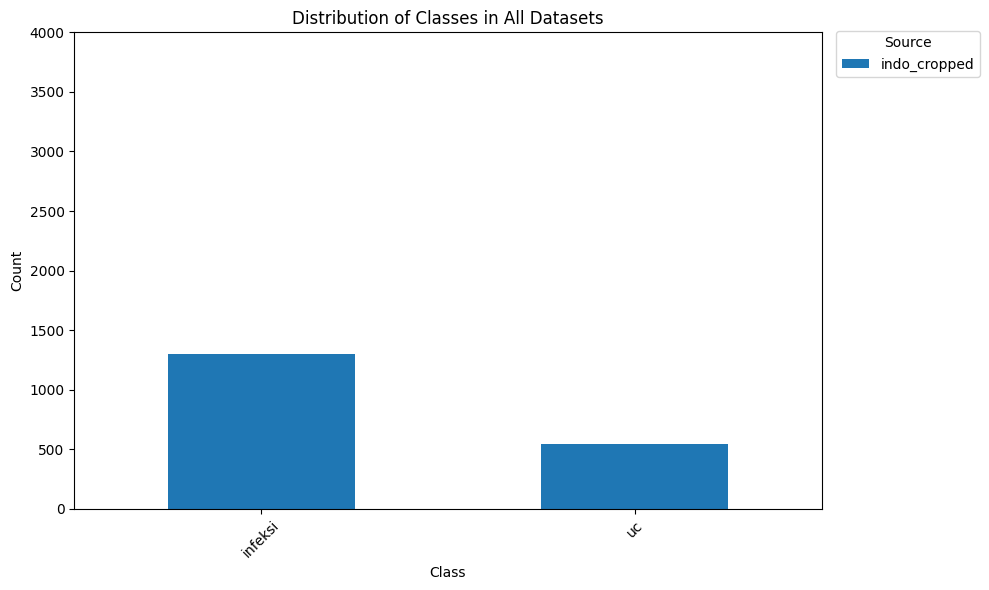

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = pd.concat([train_filenames_df, val_filenames_df, test_filenames_df], ignore_index=True)

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in All Datasets')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 4000)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


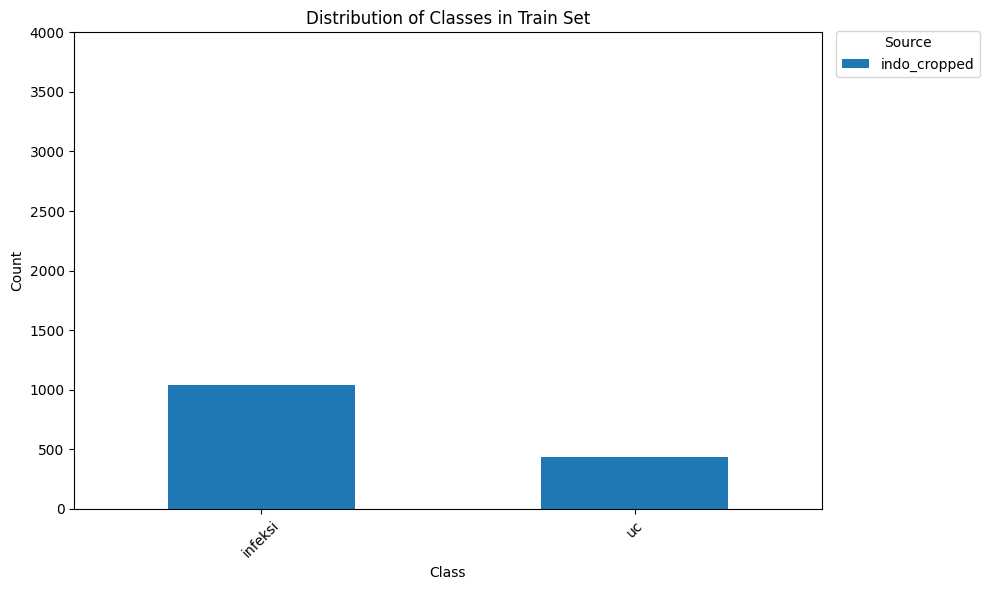

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = train_filenames_df.copy()

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in Train Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 4000)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


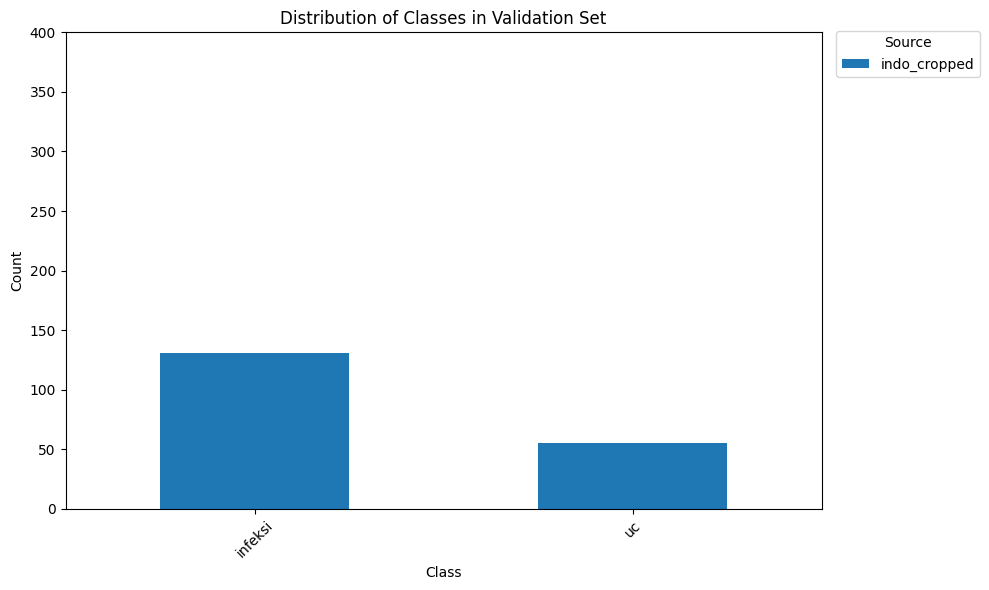

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = val_filenames_df.copy()

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in Validation Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 400)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


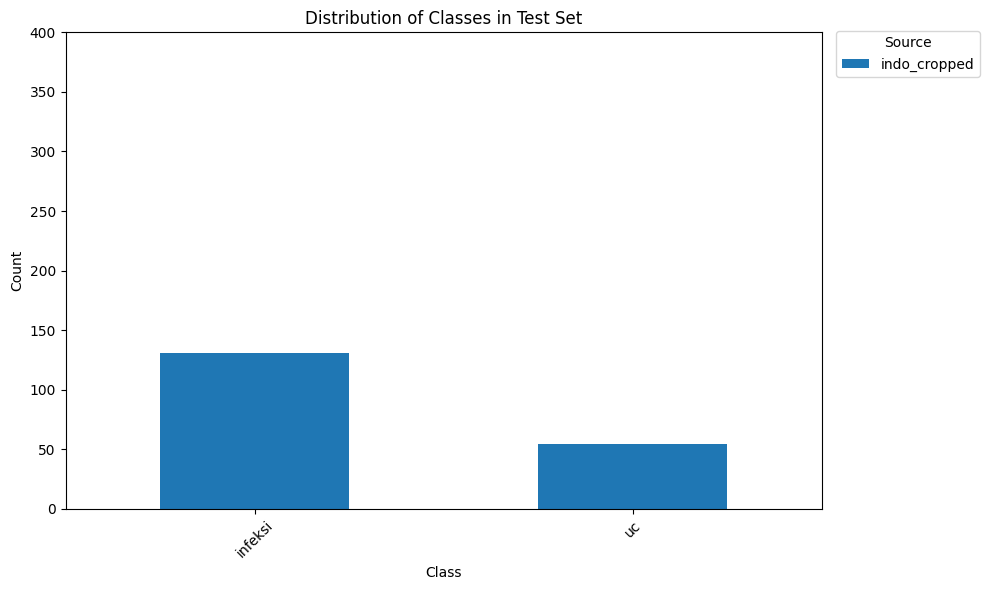

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

all_data_filenames_df = test_filenames_df.copy()

def change_indo(source):
    if source == 'indo_cropped_test':
        return 'indo_cropped'
    return source

# Apply the function to the 'source' column
all_data_filenames_df['source'] = all_data_filenames_df['source'].apply(change_indo)

# Group by then pivot
all_data_filenames_df_grouped = all_data_filenames_df.groupby(['class', 'source']).size().reset_index(name='count')
all_data_filenames_df_pivot = all_data_filenames_df_grouped.pivot(index='class', columns='source', values='count').fillna(0)

plt.figure(figsize=(10, 6))
all_data_filenames_df_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Classes in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.legend(title='Source', bbox_to_anchor=(1.01, 1.0175), loc='upper left')

plt.ylim(0, 400)  # Adjust the y-axis limit if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pre Processor

In [29]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.preprocessing" in sys.modules:
    del sys.modules["src.preprocessing"]

In [30]:
DATASET_PARAMS['CATEGORIES'] = ['uc', 'infeksi']
categories = ['uc', 'infeksi']

# DATASET_PARAMS['CATEGORIES'] = ['chron', 'tb']
# categories = ['chron', 'tb']

In [31]:
from src.preprocessing import preprocess

target_input_size = tuple(PREPROCESSING_PARAMS['INPUT_SIZE'])
train_transform = preprocess(
    target_input_size=target_input_size,
    rotation_range=PREPROCESSING_PARAMS['ROTATION_RANGE'],
    width_shift_range=PREPROCESSING_PARAMS['WIDTH_SHIFT_RANGE'],
    height_shift_range=PREPROCESSING_PARAMS['HEIGHT_SHIFT_RANGE'],
    brightness_range=PREPROCESSING_PARAMS['BRIGHTNESS_RANGE'],
    zoom_range=PREPROCESSING_PARAMS['ZOOM_RANGE'],
    horizontal_flip=PREPROCESSING_PARAMS['HORIZONTAL_FLIP'],
    vertical_flip=PREPROCESSING_PARAMS['VERTICAL_FLIP'],
    channel_shift_range=PREPROCESSING_PARAMS['CHANNEL_SHIFT_RANGE'],
    fill_mode=PREPROCESSING_PARAMS['FILL_MODE'],
    shear_range=PREPROCESSING_PARAMS['SHEAR_RANGE']
    )

val_transform = preprocess(target_input_size=target_input_size) # only rescaling

In [32]:
from src.dataset import Dataset

train_dataset = Dataset(dataframe=train_filenames_df, 
                        categories=DATASET_PARAMS['CATEGORIES'],
                        transform=train_transform, 
                        seed=42, 
                        shuffle=False)

val_dataset = Dataset(dataframe=val_filenames_df, 
                      categories=DATASET_PARAMS['CATEGORIES'],
                      transform=val_transform, 
                      seed=42, 
                      shuffle=False)

test_dataset = Dataset(dataframe=test_filenames_df, 
                      categories=DATASET_PARAMS['CATEGORIES'],
                      transform=val_transform, 
                      seed=42, 
                      shuffle=False)

## Train loader

In [33]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, 
                          batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                          shuffle=False, 
                          num_workers=TRAINING_PARAMS['NUM_WORKERS'])

val_loader = DataLoader(val_dataset, 
                          batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                          shuffle=False, 
                          num_workers=TRAINING_PARAMS['NUM_WORKERS'])

#if test_dataset exist
if test_dataset:
    test_loader = DataLoader(test_dataset, 
                             batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                             shuffle=False, 
                             num_workers=TRAINING_PARAMS['NUM_WORKERS'])

### Inpect train data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0277725].


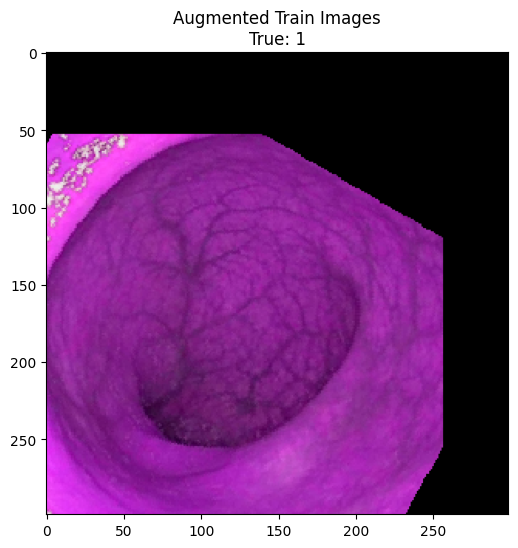

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
data, target = next(iter(train_loader))

img = data[random.randint(0, len(data) -1)].cpu().numpy()
img = np.transpose(img, (1, 2, 0))
img = img*255
plt.figure(figsize=(10, 6))
plt.title(f"Augmented Train Images\nTrue: {torch.argmax(target[random.randint(0, len(data) -1)], dim=0).item()}")
plt.imshow(img)
plt.show()

# Model

In [35]:
num_classes = len(categories)

# Compute weights for each class based on the training dataset with sklearn
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', 
                                      classes=np.arange(num_classes), 
                                      y=train_filenames_df['class'].map(lambda x: categories.index(x)))
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)

In [36]:
class_weights

tensor([1.6899, 0.7101], device='cuda:0')

### EfficientCapsNet

In [37]:
if MODEL_NAME == "CAPSNET":
    from src.model import EfficientCapsNet
    from src.loss import MarginLoss, marginLoss

    model = EfficientCapsNet(input_size=(MODEL_PARAMS['INPUT_SIZE']))
    loss = MarginLoss()
    # loss = marginLoss

### DenseNet

In [38]:
if MODEL_NAME == "DENSENET121":
    from src.densenet import DenseNet121
    from torch.nn import CrossEntropyLoss

    model = DenseNet121(num_classes=num_classes, dropout_rate=MODEL_PARAMS['DROPOUT_RATE'])
    loss = CrossEntropyLoss(weight=class_weights)

# ResNet

In [39]:
if MODEL_NAME == "RESNET50":
    from src.resnet import ResNet50
    from torch.nn import CrossEntropyLoss

    model = ResNet50(num_classes=num_classes, dropout_rate=MODEL_PARAMS['DROPOUT_RATE'])
    loss = CrossEntropyLoss()   

In [40]:
# Check number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Get number of trainable parameters
number_of_parameters = count_parameters(model)

# Convert to string for printing
number_of_parameters_str = f"{number_of_parameters:,}"

print(f"Number of trainable parameters: {number_of_parameters_str}")

Number of trainable parameters: 7,980,906


# Training

## Metrics

In [41]:
len(train_loader)*TRAINING_PARAMS['NUM_EPOCHS']

4650

In [42]:
# Optimizer
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=TRAINING_PARAMS['LEARNING_RATE'])

from torch.optim.lr_scheduler import OneCycleLR

lr_scheduler = OneCycleLR(optimizer,
                          max_lr=TRAINING_PARAMS['LEARNING_RATE']*2,    
                          steps_per_epoch=len(train_loader),
                          epochs=TRAINING_PARAMS['NUM_EPOCHS'],
                          pct_start=0.4,
                          div_factor=2,
                          final_div_factor=10,
                          )

# use torcheval metrics
# metrics
from torcheval.metrics import (
    MulticlassAccuracy,
    MulticlassF1Score,
    MulticlassPrecision,
    MulticlassAUROC,
    MulticlassAUPRC,
    MulticlassRecall    
)

# Metrics
from src.metrics import (
    MulticlassMCC,
    MulticlassSpecificity
)

metrics = {
    "mcc": MulticlassMCC(num_classes=num_classes, device=DEVICE),
    "auprc": MulticlassAUPRC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "auroc": MulticlassAUROC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "accuracy": MulticlassAccuracy(num_classes=num_classes, device=DEVICE),
    "f1_score": MulticlassF1Score(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "precision": MulticlassPrecision(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "recall": MulticlassRecall(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "specificity": MulticlassSpecificity(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE)
}

In [ ]:
from src.train import train

history = train(model=model, 
    train_loader=train_loader, 
    val_loader=val_loader, 
    criterion=loss, 
    optimizer=optimizer, 
    num_epochs=TRAINING_PARAMS['NUM_EPOCHS'], 
    device=DEVICE,
    metrics=metrics,
    print_every=TRAINING_PARAMS['PRINT_EVERY'],
    save_patience=TRAINING_PARAMS['SAVE_PATIENCE'],
    save_path=TRAINING_PARAMS['SAVE_PATH'],
    save_model=TRAINING_PARAMS['SAVE_MODEL'],
    save_metrics=TRAINING_PARAMS['SAVE_METRICS'],
    scheduler=lr_scheduler
    )

Training...


Epochs:   2%|▏         | 1/50 [02:23<1:56:51, 143.10s/it, train_loss=0.722, train_metrics=mcc: 0.0008, auprc: 0.5072, auroc: 0.5012, accuracy: 0.4787, f1_score: 0.4665, precision: 0.5004, recall: 0.5004, specificity: 0.5004, val_loss=0.662, val_metrics=mcc: 0.2005, auprc: 0.5770, auroc: 0.5910, accuracy: 0.5430, f1_score: 0.5392, precision: 0.5939, recall: 0.6070, specificity: 0.6070]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_1.pth


Epochs:   4%|▍         | 2/50 [04:10<1:37:43, 122.16s/it, train_loss=0.69, train_metrics=mcc: 0.1174, auprc: 0.5427, auroc: 0.5627, accuracy: 0.5592, f1_score: 0.5372, precision: 0.5536, recall: 0.5643, specificity: 0.5643, val_loss=0.656, val_metrics=mcc: 0.2238, auprc: 0.6028, auroc: 0.6144, accuracy: 0.6989, f1_score: 0.6069, precision: 0.6232, recall: 0.6017, specificity: 0.6017] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_2.pth


Epochs:   8%|▊         | 4/50 [06:54<1:13:02, 95.26s/it, train_loss=0.655, train_metrics=mcc: 0.1836, auprc: 0.6053, auroc: 0.6257, accuracy: 0.6100, f1_score: 0.5793, precision: 0.5845, recall: 0.5997, specificity: 0.5997, val_loss=0.634, val_metrics=mcc: 0.2751, auprc: 0.6749, auroc: 0.6620, accuracy: 0.6882, f1_score: 0.6367, precision: 0.6337, recall: 0.6415, specificity: 0.6415] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_4.pth


Epochs:  10%|█         | 5/50 [08:31<1:11:51, 95.82s/it, train_loss=0.649, train_metrics=mcc: 0.2455, auprc: 0.6115, auroc: 0.6436, accuracy: 0.6276, f1_score: 0.6042, precision: 0.6124, recall: 0.6341, specificity: 0.6341, val_loss=0.611, val_metrics=mcc: 0.3002, auprc: 0.7040, auroc: 0.6997, accuracy: 0.6989, f1_score: 0.6492, precision: 0.6459, recall: 0.6544, specificity: 0.6544]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_5.pth


Epochs:  12%|█▏        | 6/50 [10:18<1:12:58, 99.52s/it, train_loss=0.644, train_metrics=mcc: 0.1961, auprc: 0.6332, auroc: 0.6494, accuracy: 0.6107, f1_score: 0.5831, precision: 0.5900, recall: 0.6068, specificity: 0.6068, val_loss=0.608, val_metrics=mcc: 0.3189, auprc: 0.6869, auroc: 0.6981, accuracy: 0.6667, f1_score: 0.6429, precision: 0.6464, recall: 0.6737, specificity: 0.6737]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_6.pth


Epochs:  14%|█▍        | 7/50 [11:50<1:09:35, 97.10s/it, train_loss=0.625, train_metrics=mcc: 0.2899, auprc: 0.6452, auroc: 0.6849, accuracy: 0.6520, f1_score: 0.6280, precision: 0.6330, recall: 0.6580, specificity: 0.6580, val_loss=0.595, val_metrics=mcc: 0.2599, auprc: 0.6907, auroc: 0.7064, accuracy: 0.6559, f1_score: 0.6216, precision: 0.6209, recall: 0.6397, specificity: 0.6397]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_7.pth


Epochs:  18%|█▊        | 9/50 [15:13<1:07:12, 98.34s/it, train_loss=0.598, train_metrics=mcc: 0.3365, auprc: 0.6833, auroc: 0.7173, accuracy: 0.6831, f1_score: 0.6560, precision: 0.6554, recall: 0.6821, specificity: 0.6821, val_loss=0.569, val_metrics=mcc: 0.4152, auprc: 0.7314, auroc: 0.7643, accuracy: 0.7043, f1_score: 0.6859, precision: 0.6900, recall: 0.7268, specificity: 0.7268] 

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_9.pth


Epochs:  22%|██▏       | 11/50 [22:19<1:44:57, 161.48s/it, train_loss=0.582, train_metrics=mcc: 0.3496, auprc: 0.7026, auroc: 0.7403, accuracy: 0.6886, f1_score: 0.6621, precision: 0.6614, recall: 0.6893, specificity: 0.6893, val_loss=0.564, val_metrics=mcc: 0.4031, auprc: 0.7450, auroc: 0.7695, accuracy: 0.7473, f1_score: 0.7013, precision: 0.6985, recall: 0.7046, specificity: 0.7046]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_11.pth


Epochs:  24%|██▍       | 12/50 [25:15<1:45:01, 165.82s/it, train_loss=0.563, train_metrics=mcc: 0.3978, auprc: 0.7234, auroc: 0.7586, accuracy: 0.7089, f1_score: 0.6849, precision: 0.6835, recall: 0.7157, specificity: 0.7157, val_loss=0.547, val_metrics=mcc: 0.4366, auprc: 0.7402, auroc: 0.7831, accuracy: 0.7419, f1_score: 0.7120, precision: 0.7051, recall: 0.7324, specificity: 0.7324]

Model saved to artifacts/uc_infeksi_chron_tb/densenet121\epoch_12.pth


In [ ]:
import json

with open("artifacts/uc_infeksi_chron_tb/densenet121/training_history.json", "r") as f:
    history = json.load(f)

In [ ]:
import matplotlib.pyplot as plt

train_loss = history["train_loss"]
val_loss = history["val_loss"]
epoch = range(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch, train_loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()


# Test

using validation data

## Initialization

In [ ]:
from src.utils import load_model

# model = load_model("artifacts/resnet50/epoch_15.pth", num_classes=num_classes, dropout_rate=MODEL_PARAMS['DROPOUT_RATE'])
# model = load_model("artifacts/densenet121/epoch_10.pth", num_classes=2, dropout_rate=0.25)

model.load_state_dict(torch.load("artifacts/uc_infeksi_chron_tb/densenet121/epoch_32_cd_tb_3_lr_0.000025_model_baru_best_dropout_0.3.pth", map_location=DEVICE))
model = model.to(DEVICE)

In [ ]:
num_classes = len(categories)
# metrics
from torcheval.metrics import (
    MulticlassAccuracy,
    MulticlassF1Score,
    MulticlassPrecision,
    MulticlassAUROC,
    MulticlassAUPRC,
    MulticlassRecall    
)

# Metrics
from src.metrics import (
    MulticlassMCC,
    MulticlassSpecificity
)

test_metrics = {
    "mcc": MulticlassMCC(num_classes=num_classes, device=DEVICE),
    "auprc": MulticlassAUPRC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "auroc": MulticlassAUROC(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "accuracy": MulticlassAccuracy(num_classes=num_classes, device=DEVICE),
    "f1_score": MulticlassF1Score(num_classes=num_classes, average= TRAINING_PARAMS['AVERAGE'], device=DEVICE),
    "precision": MulticlassPrecision(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "recall": MulticlassRecall(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE),
    "specificity": MulticlassSpecificity(num_classes=num_classes, average=TRAINING_PARAMS['AVERAGE'], device = DEVICE)
}

## Confussion Matrix

In [ ]:
from src.test import test

raw_predictions, predicted_indices_flattened, target_indices_flattened, test_metrics = test(model = model, test_loader = test_loader, device = DEVICE, metrics=test_metrics)

In [ ]:
test_metrics

In [ ]:
# Convert test_metrics to DataFrame
test_metrics_df = pd.DataFrame(test_metrics, index=['value'])

In [ ]:
test_metrics_df.T

In [ ]:
categories

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Calculate confusion matrix
cm = confusion_matrix(target_indices_flattened, predicted_indices_flattened)

# Create figure and axis
plt.figure(figsize=(7.5, 8/10*7.5))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories,
            yticklabels=categories)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()


In [ ]:
# Concat raw_predictions (which is a list of tensor arrays) into a single tensor
raw_predictions_cat = torch.cat(raw_predictions, dim=0)
raw_predictions_np = raw_predictions_cat.cpu().numpy()

from torch.nn.functional import softmax
# Convert raw predictions to probabilities
raw_predictions_prob = softmax(torch.tensor(raw_predictions_np), dim=1).numpy()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, matthews_corrcoef
from imblearn.metrics import specificity_score

matthews_corrcoef_value = matthews_corrcoef(target_indices_flattened, predicted_indices_flattened)
accuracy = accuracy_score(target_indices_flattened, predicted_indices_flattened)
f1 = f1_score(target_indices_flattened, predicted_indices_flattened, average=None)
precision = precision_score(target_indices_flattened, predicted_indices_flattened, average=None)
recall = recall_score(target_indices_flattened, predicted_indices_flattened, average=None)
specificity = specificity_score(target_indices_flattened, predicted_indices_flattened, average=None)
roc_auc = roc_auc_score(target_indices_flattened, raw_predictions_prob[:, 1], multi_class='ovr', average=None)
average_precision = average_precision_score(target_indices_flattened, raw_predictions_prob[:, 1], average=None)

# Convert metrics to DataFrame for better visualization
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Specificity', 'ROC AUC (OVR)', 'ROC PRC', 'MCC'],
#     'UC': [accuracy, f1[0], precision[0], recall[0], specificity[0], roc_auc[0], average_precision[0], matthews_corrcoef_value],
#     'Infeksi': [accuracy, f1[1], precision[1], recall[1], specificity[1], roc_auc[1], average_precision[1], matthews_corrcoef_value],
#     'CD': [accuracy, f1[2], precision[2], recall[2], specificity[2], roc_auc[2], average_precision[2], matthews_corrcoef_value],
#     'TB': [accuracy, f1[3], precision[3], recall[3], specificity[3], roc_auc[3], average_precision[3], matthews_corrcoef_value]
# })

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Specificity', 'ROC AUC (OVR)', 'ROC PRC', 'MCC'],
    categories[0]: [accuracy, f1[0], precision[0], recall[0], specificity[0], roc_auc, average_precision, matthews_corrcoef_value],
    categories[1]: [accuracy, f1[1], precision[1], recall[1], specificity[1], roc_auc, average_precision, matthews_corrcoef_value]
})

metrics_df.set_index('Metric', inplace=True)
metrics_df

In [ ]:
output_test_filenames_df = test_filenames_df.copy()
output_test_filenames_df['predicted'] = predicted_indices_flattened
output_test_filenames_df['predicted'] = output_test_filenames_df['predicted'].apply(lambda x: categories[x])
output_test_filenames_df

indo_test_filenames_df = output_test_filenames_df[(output_test_filenames_df['source'] == 'indo_cropped') | (output_test_filenames_df['class'] == 'infeksi')]

target_indices_flattened_indo = target_indices_flattened[indo_test_filenames_df.index]
predicted_indices_flattened_indo = predicted_indices_flattened[indo_test_filenames_df.index]
raw_predictions_prob_indo = raw_predictions_prob[indo_test_filenames_df.index]

In [ ]:
matthews_corrcoef_value_indo = matthews_corrcoef(target_indices_flattened_indo, predicted_indices_flattened_indo)
accuracy_indo = accuracy_score(target_indices_flattened_indo, predicted_indices_flattened_indo)
f1_indo = f1_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)
precision_indo = precision_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)
recall_indo = recall_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)
roc_auc_indo = roc_auc_score(target_indices_flattened_indo, raw_predictions_prob_indo, multi_class='ovr', average=None)
average_precision_indo = average_precision_score(target_indices_flattened_indo, raw_predictions_prob_indo, average=None)
specificity_indo = specificity_score(target_indices_flattened_indo, predicted_indices_flattened_indo, average=None)

# Convert metrics to DataFrame for better visualization
metrics_indo_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Specificity', 'ROC AUC (OVR)', 'ROC PRC', 'MCC'],
    'UC': [accuracy_indo, f1_indo[0], precision_indo[0], recall_indo[0], specificity_indo[0], roc_auc_indo[0], average_precision_indo[0], matthews_corrcoef_value_indo],
    'Infeksi': [accuracy_indo, f1_indo[1], precision_indo[1], recall_indo[1], specificity_indo[1], roc_auc_indo[1], average_precision_indo[1], matthews_corrcoef_value_indo],
    'CD': [accuracy_indo, f1_indo[2], precision_indo[2], recall_indo[2], specificity_indo[2], roc_auc_indo[2], average_precision_indo[2], matthews_corrcoef_value_indo],
    'TB': [accuracy_indo, f1_indo[3], precision_indo[3], recall_indo[3], specificity_indo[3], roc_auc_indo[3], average_precision_indo[3], matthews_corrcoef_value_indo]
})
metrics_indo_df.set_index('Metric', inplace=True)
metrics_indo_df

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(target_indices_flattened_indo, predicted_indices_flattened_indo)

# Create figure and axis
plt.figure(figsize=(7.5, 8/10*7.5))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['UC', 'Infeksi', 'CD', 'TB'],
            yticklabels=['UC', 'Infeksi', 'CD', 'TB'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()


## Test Metrics

In [ ]:
sample_image, sample_target = test_dataset[10]
sample_image = sample_image.unsqueeze(0).to(DEVICE)

with torch.no_grad():
    prediction = model(sample_image)
    predicted_class = torch.argmax(prediction, dim=1).item()

sample_image_np = sample_image.squeeze().cpu().numpy()
sample_image_np = np.transpose(sample_image_np, (1, 2, 0))
sample_image_np = sample_image_np*255
plt.figure(figsize=(8, 6))
plt.imshow(sample_image_np)
plt.title(f'Predicted Class: {"UC" if predicted_class == 0 else "Infeksi"}\n True Class: {"UC" if torch.argmax(sample_target).item() == 0 else "Infeksi"}\nConfidence: {torch.max(prediction).item():.2f}')
plt.axis('off')
plt.show()

print(f"True class: {'UC' if torch.argmax(sample_target).item() == 0 else 'Infeksi'}")
print(f"Predicted class: {'UC' if predicted_class == 0 else 'Infeksi'}")

# XDL

## GradCAM

In [ ]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.xdl" in sys.modules:
    del sys.modules["src.xdl"]

In [ ]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.xdl" in sys.modules:
    del sys.modules["src.xdl"]

from src.xdl import plot_XDL_GradCAM


plot_XDL_GradCAM(model = model, 
                 test_loader = test_loader, 
                 device = DEVICE, 
                 print_img = True, 
                 num_samples = 100, 
                 save_path = False)

## Smoothgrad

In [ ]:
uc_train_len = len(train_filenames_df[train_filenames_df['class'] == 'uc'])
uc_val_len = len(val_filenames_df[val_filenames_df['class'] == 'uc'])
uc_test_len = len(test_filenames_df[test_filenames_df['class'] == 'uc'])

print(f"""UC (LIMUC+Changsu) train: {uc_train_len}
      \nUC (LIMUC+Changsu) val: {uc_val_len}
      \nUC (LIMUC+Changsu) test: {uc_test_len}
      \nTotal: {uc_train_len + uc_val_len + uc_test_len}""")

In [ ]:
from src.xdl import plot_XDL_SmoothGrad

plot_XDL_SmoothGrad(model, 
                    test_loader, 
                    n_samples_smoothgrad=150,
                    noise_level=0.1,
                    device=DEVICE, 
                    num_samples=len(test_loader.dataset.dataframe), 
                    print_img=False, 
                    print_every=10, 
                    save_path="outputs/smoothgrad/limuc_cropped_novasir_2",
                    smoothgrad_percentile=97,
                    smoothgrad_colormap='viridis',
                    smoothgrad_overlay_alpha=0.4,
                    fontsize=14)

In [ ]:
from src.xdl import plot_XDL_SmoothGrad

plot_XDL_SmoothGrad(model, 
                    test_loader, 
                    n_samples_smoothgrad=150,
                    noise_level=0.1,
                    device=DEVICE, 
                    num_samples=5, 
                    print_img=True, 
                    print_every=10, 
                    save_path=False,
                    smoothgrad_percentile=91,
                    smoothgrad_colormap='viridis',
                    smoothgrad_overlay_alpha=0.6,
                    fontsize=14)

In [ ]:
from src.xdl import plot_XDL_SmoothGrad

plot_XDL_SmoothGrad(model, 
                    test_loader, 
                    n_samples_smoothgrad=150,
                    noise_level=0.1,
                    device=DEVICE, 
                    num_samples=5, 
                    print_img=True, 
                    print_every=10, 
                    save_path=False,
                    smoothgrad_percentile=98,
                    smoothgrad_colormap='hot',
                    smoothgrad_overlay_alpha=0.3)

## GradCAM + Smoothgrad

In [ ]:
import sys

# Delete "src.xdl" from sys.modules to avoid circular import issues
if "src.xdl" in sys.modules:
    del sys.modules["src.xdl"]

In [ ]:
output_test_filenames_df = output_test_filenames_df[output_test_filenames_df['source'].isin(['indo_cropped', 'indo_cropped_test'])].copy()
output_test_filenames_df['predicted_class'] = output_test_filenames_df['predicted']
# Sample 100 images from the test set for each class
# output_test_filenames_df = output_test_filenames_df.groupby('class').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Randomly shuffle the sampled images
output_test_filenames_df = output_test_filenames_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Make Dataset
output_test_dataset = Dataset(dataframe=output_test_filenames_df, 
                              categories=DATASET_PARAMS['CATEGORIES'],
                              transform=val_transform, 
                              seed=42, 
                              shuffle=True)

# Make DataLoader
output_test_loader = DataLoader(output_test_dataset, 
                                 batch_size=TRAINING_PARAMS['BATCH_SIZE'], 
                                 num_workers=TRAINING_PARAMS['NUM_WORKERS'])

In [ ]:
from src.xdl import plot_XDL_Visualizations

plot_XDL_Visualizations(model, 
                        output_test_loader, 
                        device=DEVICE, 
                        num_samples=len(output_test_loader.dataset.dataframe), 
                        print_img=True, 
                        print_every=5, 
                        save_path="outputs/xdl/chron_tb_12_08_2025",)